## MediaPipe Pose Example

- Reference: https://google.github.io/mediapipe/solutions/pose

In [1]:
import cv2
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [2]:
image = cv2.imread("../data/sample.jpeg")
image_height, image_width, _ = image.shape
print(f"[Image] height={image_height}, width={image_width}")

[Image] height=4000, width=6000


Nose coordinates: (3502.256155014038, 1606.4025163650513)


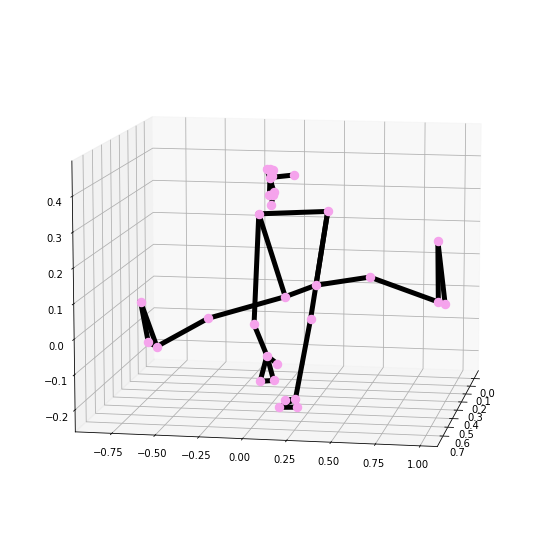

In [3]:
with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    min_detection_confidence=0.5
) as pose:
    # Convert the BGR image to RGB before processing.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.pose_landmarks:
        print(
            f'Nose coordinates: ('
            f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
            f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_height})'
        )
        # Draw pose landmarks on the image.
        annotated_image = image.copy()        
        mp_drawing.draw_landmarks(
            image = annotated_image,
            landmark_list=results.pose_landmarks,
            connections=mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(236,163,245), thickness=10, circle_radius=10),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(236,163,245), thickness=10, circle_radius=2),
        )
        cv2.imwrite('../data/sample_posed.jpeg', annotated_image)
        # Plot pose world landmarks.
        mp_drawing.plot_landmarks(
            landmark_list=results.pose_world_landmarks, 
            connections=mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(236,163,245), thickness=5, circle_radius=2),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(0,0,0), thickness=5, circle_radius=2),
        )

|Input|Output|
|:-:|:-:|
|![input](../data/sample.jpeg)|![output](../data/sample_posed.jpeg)|                